In [1]:
from rxitect.models.lightning.generator import Generator
import torch
from rxitect.structs.vocabulary import SelfiesVocabulary

In [2]:
selfies_lstm = torch.load("../models/lightning_logs/version_4/checkpoints/epoch=14-step=44879.ckpt")

In [3]:
voc = SelfiesVocabulary("../data/processed/selfies_voc.txt")
prior = Generator(vocabulary=voc)
prior.load_state_dict(selfies_lstm['state_dict'])

<All keys matched successfully>

In [4]:
from rdkit import Chem
# from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
# IPythonConsole.ipython_useSVG=True

NameError: name 'IPythonConsole' is not defined

In [5]:
x = prior.sample(10)

In [6]:
import selfies as sf

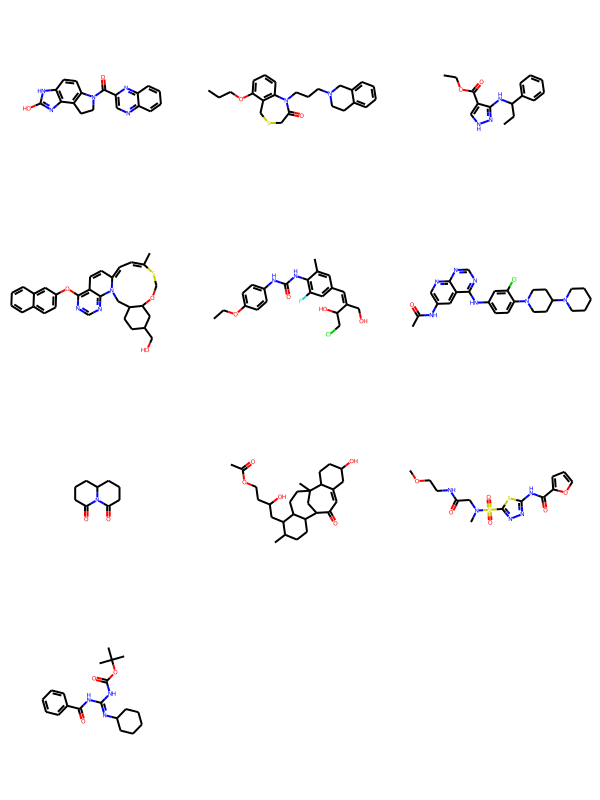

In [7]:
decoded_samples = [sf.decoder(voc.decode(sample)) for sample in x]
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in decoded_samples])

In [29]:
test_sample = prior.sample(1024)

In [36]:
decode_test_samples = [voc.decode(smp) for smp in test_sample]

In [42]:
len(list(sf.split_selfies(decode_test_samples[0])))

61

In [44]:
lengths = []
for smp in decode_test_samples:
    lengths.append(len(list(sf.split_selfies(smp))))

In [49]:
import numpy as np

np.std(lengths)

13.463247462980494

# - Make check when generating chemical space to not grow past 109 tokens
# - How should we replace the evolve step that uses NNs?